In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import tensorflow as tf

# Load landmark data from CSV
df = pd.read_csv('coords-full.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values


# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

accuracy_values = []
mse_values = []

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 1
epochs = 10

labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.3, random_state=42
)

# Convert one-hot encoded labels to a single column
labels_test_single_column = labels_test.argmax(axis=1)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(landmarks_train, labels_train.argmax(axis=1))
rf_predictions = rf_model.predict(landmarks_test)
rf_mse = mean_squared_error(labels_test_single_column, rf_predictions)


# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train.argmax(axis=1))
dt_predictions = dt_model.predict(landmarks_test)
dt_mse = mean_squared_error(labels_test_single_column, dt_predictions)


# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(landmarks_train, labels_train.argmax(axis=1))
svm_predictions = svm_model.predict(landmarks_test)
svm_mse = mean_squared_error(labels_test_single_column, svm_predictions)



# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train.argmax(axis=1))
mlp_predictions = mlp_model.predict(landmarks_test)
mlp_mse = mean_squared_error(labels_test_single_column, mlp_predictions)



# Evaluate the Random Forest model
rf_accuracy = accuracy_score(labels_test.argmax(axis=1), rf_predictions)
rf_precision = precision_score(labels_test.argmax(axis=1), rf_predictions, average='weighted')
rf_recall = recall_score(labels_test.argmax(axis=1), rf_predictions, average='weighted')
rf_f1 = f1_score(labels_test.argmax(axis=1), rf_predictions, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Mean Squared Error: {rf_mse}")

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(labels_test.argmax(axis=1), dt_predictions)
dt_precision = precision_score(labels_test.argmax(axis=1), dt_predictions, average='weighted')
dt_recall = recall_score(labels_test.argmax(axis=1), dt_predictions, average='weighted')
dt_f1 = f1_score(labels_test.argmax(axis=1), dt_predictions, average='weighted')

print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")
print(f"Mean Squared Error: {dt_mse}")


# Evaluate the SVM model
svm_accuracy = accuracy_score(labels_test.argmax(axis=1), svm_predictions)
svm_precision = precision_score(labels_test.argmax(axis=1), svm_predictions, average='weighted')
svm_recall = recall_score(labels_test.argmax(axis=1), svm_predictions, average='weighted')
svm_f1 = f1_score(labels_test.argmax(axis=1), svm_predictions, average='weighted')

print("\nSVM Metrics:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"Mean Squared Error: {svm_mse}")

# Evaluate the MLP model
mlp_accuracy = accuracy_score(labels_test.argmax(axis=1), mlp_predictions)
mlp_precision = precision_score(labels_test.argmax(axis=1), mlp_predictions, average='weighted')
mlp_recall = recall_score(labels_test.argmax(axis=1), mlp_predictions, average='weighted')
mlp_f1 = f1_score(labels_test.argmax(axis=1), mlp_predictions, average='weighted')

print("\nMLP Metrics:")
print(f"Accuracy: {mlp_accuracy}")
print(f"Precision: {mlp_precision}")
print(f"Recall: {mlp_recall}")
print(f"F1 Score: {mlp_f1}")
print(f"Mean Squared Error: {mlp_mse}")



Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Squared Error: 0.0

Decision Tree Metrics:
Accuracy: 0.9959432048681541
Precision: 0.9960719920151968
Recall: 0.9959432048681541
F1 Score: 0.9959587311480464
Mean Squared Error: 0.004056795131845842

SVM Metrics:
Accuracy: 0.9634888438133874
Precision: 0.9659474423476927
Recall: 0.9634888438133874
F1 Score: 0.9633346883770676
Mean Squared Error: 0.08519269776876268

MLP Metrics:
Accuracy: 0.9411764705882353
Precision: 0.9420826813484015
Recall: 0.9411764705882353
F1 Score: 0.9411256587209573
Mean Squared Error: 0.24949290060851928


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/10 - Accuracy: 1.0
Epoch 2/10 - Accuracy: 1.0
Epoch 3/10 - Accuracy: 1.0
Epoch 4/10 - Accuracy: 1.0
Epoch 5/10 - Accuracy: 0.9959432048681541
Epoch 6/10 - Accuracy: 0.9979716024340771
Epoch 7/10 - Accuracy: 1.0
Epoch 8/10 - Accuracy: 1.0
Epoch 9/10 - Accuracy: 1.0
Epoch 10/10 - Accuracy: 0.9979716024340771


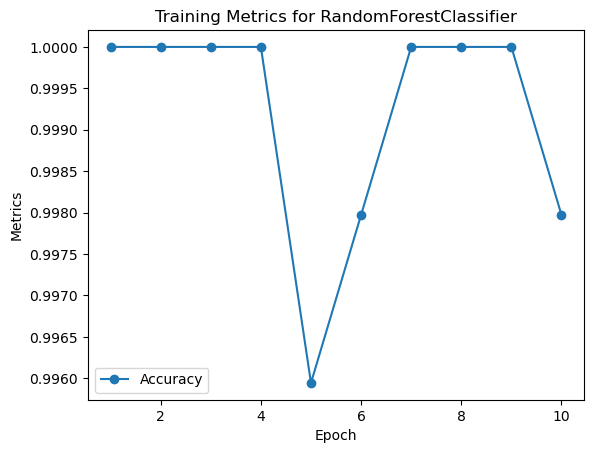

C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import tensorflow as tf

# Load landmark data from CSV
df = pd.read_csv('up-down-dbad-ubad-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

accuracy_values = []

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 1
epochs = 10

labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.3, random_state=42
)

# Convert one-hot encoded labels to a single column
labels_test_single_column = labels_test.argmax(axis=1)

# Random Forest
rf_model = RandomForestClassifier()
#rf_model.fit(landmarks_train, labels_train.argmax(axis=1))
#rf_predictions = rf_model.predict(landmarks_test)
#rf_mse = mean_squared_error(labels_test_single_column, rf_predictions)


for epoch in range(epochs):  # Adjust 'epochs' based on your desired number of iterations
    # Train the model
    rf_model.fit(landmarks_train, labels_train)
    
    # Evaluate on the test set
    rf_predictions = rf_model.predict(landmarks_test)
    
    # Calculate and store metrics
    accuracy = accuracy_score(labels_test, rf_predictions)
    
    accuracy_values.append(accuracy)


    print(f'Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy}')

# Plot training metrics
plt.plot(range(1, epochs + 1), accuracy_values, label='Accuracy', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Training Metrics for RandomForestClassifier')
plt.legend()
plt.show()



# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train.argmax(axis=1))
dt_predictions = dt_model.predict(landmarks_test)
dt_mse = mean_squared_error(labels_test_single_column, dt_predictions)


# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(landmarks_train, labels_train.argmax(axis=1))
svm_predictions = svm_model.predict(landmarks_test)
svm_mse = mean_squared_error(labels_test_single_column, svm_predictions)



# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train.argmax(axis=1))
mlp_predictions = mlp_model.predict(landmarks_test)
mlp_mse = mean_squared_error(labels_test_single_column, mlp_predictions)



In [32]:
from sklearn.neural_network import MLPClassifier
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [35]:
# Load landmark data from CSV
df = pd.read_csv('good-bend-cvin-cvout-nohands-rmv.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values

# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

accuracy_values = []

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 1
epochs = 10

labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.3, random_state=42)

# Convert one-hot encoded labels to a single column
labels_test_single_column = labels_test.argmax(axis=1)

labels_train_1d = np.argmax(labels_train, axis=1)
labels_test_1d = np.argmax(labels_test, axis=1)

In [36]:
pipelines = {
    'rc': make_pipeline(RidgeClassifier()),
    'rf': make_pipeline(RandomForestClassifier()),
    'dc': make_pipeline(DecisionTreeClassifier()),
    'svm': make_pipeline(SVC(kernel='linear', C=1.0, decision_function_shape='ovr')),
    'mlp': make_pipeline(MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs, random_state=42)),
}

Epoch 1/10 - rc - Accuracy: 0.9259681093394078
Epoch 2/10 - rc - Accuracy: 0.9259681093394078
Epoch 3/10 - rc - Accuracy: 0.9259681093394078
Epoch 4/10 - rc - Accuracy: 0.9259681093394078
Epoch 5/10 - rc - Accuracy: 0.9259681093394078
Epoch 6/10 - rc - Accuracy: 0.9259681093394078
Epoch 7/10 - rc - Accuracy: 0.9259681093394078
Epoch 8/10 - rc - Accuracy: 0.9259681093394078
Epoch 9/10 - rc - Accuracy: 0.9259681093394078
Epoch 10/10 - rc - Accuracy: 0.9259681093394078
Epoch 1/10 - rf - Accuracy: 0.9960136674259681
Epoch 2/10 - rf - Accuracy: 0.9982915717539863
Epoch 3/10 - rf - Accuracy: 0.9982915717539863
Epoch 4/10 - rf - Accuracy: 0.9965831435079726
Epoch 5/10 - rf - Accuracy: 0.9971526195899773
Epoch 6/10 - rf - Accuracy: 0.9971526195899773
Epoch 7/10 - rf - Accuracy: 0.9971526195899773
Epoch 8/10 - rf - Accuracy: 0.9977220956719818
Epoch 9/10 - rf - Accuracy: 0.9971526195899773
Epoch 10/10 - rf - Accuracy: 0.9971526195899773
Epoch 1/10 - dc - Accuracy: 0.9857630979498861
Epoch 2/10 

C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/10 - mlp - Accuracy: 0.892369020501139


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/10 - mlp - Accuracy: 0.892369020501139


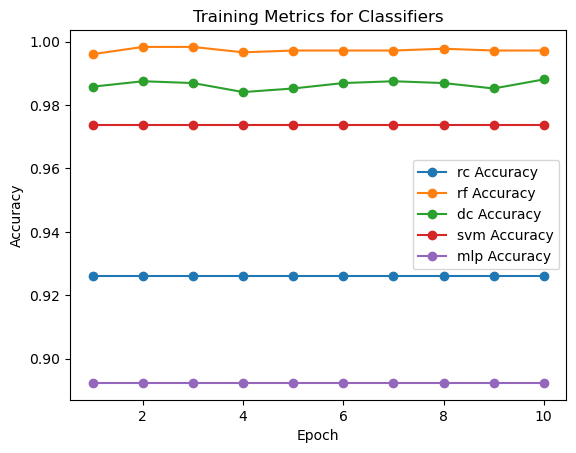

In [37]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'landmarks_train', 'labels_train', 'landmarks_test', 'labels_test' are your training and testing data
# 'pipelines' is the dictionary of your pipelines

# Specify the number of epochs
epochs = 10  # You can adjust this based on your needs

# Dictionary to store accuracy values for each classifier
accuracy_values = {}

# Training loop
for classifier_name, pipeline in pipelines.items():
    classifier_accuracy_values = []
    
    for epoch in range(epochs):
        # Train the model
        pipeline.fit(landmarks_train, labels_train_1d)
        
        # Evaluate on the test set
        predictions = pipeline.predict(landmarks_test)
        
        # Calculate and store metrics
        accuracy = accuracy_score(labels_test_1d, predictions)
        classifier_accuracy_values.append(accuracy)

        print(f'Epoch {epoch + 1}/{epochs} - {classifier_name} - Accuracy: {accuracy}')

    # Store accuracy values for each classifier
    accuracy_values[classifier_name] = classifier_accuracy_values

# Plot training metrics for each classifier
for classifier_name, accuracy_list in accuracy_values.items():
    plt.plot(range(1, epochs + 1), accuracy_list, label=f'{classifier_name} Accuracy', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Metrics for Classifiers')
plt.legend()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import tensorflow as tf

# Load landmark data from CSV
df = pd.read_csv('coords-full.csv')

# Assuming your CSV has columns for coordinates and labels
landmarks = df.drop(columns=['class']).values
labels = df['class'].values


# Convert string labels to integer labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

accuracy_values = []
mse_values = []

# Define parameters
num_landmarks = landmarks.shape[1]  # Assuming the number of landmarks is fixed
batch_size = 1
epochs = 10

labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=4)

# Data splitting
landmarks_train, landmarks_test, labels_train, labels_test = train_test_split(
    landmarks, labels_one_hot, test_size=0.3, random_state=42
)

# Convert one-hot encoded labels to a single column
labels_test_single_column = labels_test.argmax(axis=1)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(landmarks_train, labels_train.argmax(axis=1))
rf_predictions = rf_model.predict(landmarks_test)
rf_mse = mean_squared_error(labels_test_single_column, rf_predictions)


# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(landmarks_train, labels_train.argmax(axis=1))
dt_predictions = dt_model.predict(landmarks_test)
dt_mse = mean_squared_error(labels_test_single_column, dt_predictions)


# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(landmarks_train, labels_train.argmax(axis=1))
svm_predictions = svm_model.predict(landmarks_test)
svm_mse = mean_squared_error(labels_test_single_column, svm_predictions)



# Multilayer Perceptron (MLP) using scikit-learn
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=epochs)
mlp_model.fit(landmarks_train, labels_train.argmax(axis=1))
mlp_predictions = mlp_model.predict(landmarks_test)
mlp_mse = mean_squared_error(labels_test_single_column, mlp_predictions)



# Evaluate the Random Forest model
rf_accuracy = accuracy_score(labels_test.argmax(axis=1), rf_predictions)
rf_precision = precision_score(labels_test.argmax(axis=1), rf_predictions, average='weighted')
rf_recall = recall_score(labels_test.argmax(axis=1), rf_predictions, average='weighted')
rf_f1 = f1_score(labels_test.argmax(axis=1), rf_predictions, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Mean Squared Error: {rf_mse}")

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(labels_test.argmax(axis=1), dt_predictions)
dt_precision = precision_score(labels_test.argmax(axis=1), dt_predictions, average='weighted')
dt_recall = recall_score(labels_test.argmax(axis=1), dt_predictions, average='weighted')
dt_f1 = f1_score(labels_test.argmax(axis=1), dt_predictions, average='weighted')

print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")
print(f"Mean Squared Error: {dt_mse}")


# Evaluate the SVM model
svm_accuracy = accuracy_score(labels_test.argmax(axis=1), svm_predictions)
svm_precision = precision_score(labels_test.argmax(axis=1), svm_predictions, average='weighted')
svm_recall = recall_score(labels_test.argmax(axis=1), svm_predictions, average='weighted')
svm_f1 = f1_score(labels_test.argmax(axis=1), svm_predictions, average='weighted')

print("\nSVM Metrics:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"Mean Squared Error: {svm_mse}")

# Evaluate the MLP model
mlp_accuracy = accuracy_score(labels_test.argmax(axis=1), mlp_predictions)
mlp_precision = precision_score(labels_test.argmax(axis=1), mlp_predictions, average='weighted')
mlp_recall = recall_score(labels_test.argmax(axis=1), mlp_predictions, average='weighted')
mlp_f1 = f1_score(labels_test.argmax(axis=1), mlp_predictions, average='weighted')

print("\nMLP Metrics:")
print(f"Accuracy: {mlp_accuracy}")
print(f"Precision: {mlp_precision}")
print(f"Recall: {mlp_recall}")
print(f"F1 Score: {mlp_f1}")
print(f"Mean Squared Error: {mlp_mse}")




Random Forest Metrics:
Accuracy: 0.990506329113924
Precision: 0.9905322964150798
Recall: 0.990506329113924
F1 Score: 0.9905093050358358
Mean Squared Error: 0.00949367088607595

Decision Tree Metrics:
Accuracy: 0.9936708860759493
Precision: 0.9937587904360056
Recall: 0.9936708860759493
F1 Score: 0.9936747236081399
Mean Squared Error: 0.006329113924050633

SVM Metrics:
Accuracy: 0.9968354430379747
Precision: 0.9968575728069399
Recall: 0.9968354430379747
F1 Score: 0.9968364350119453
Mean Squared Error: 0.0031645569620253164

MLP Metrics:
Accuracy: 0.9936708860759493
Precision: 0.9937587904360056
Recall: 0.9936708860759493
F1 Score: 0.9936747236081399
Mean Squared Error: 0.006329113924050633


C:\Users\eddcr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
rf_accuracy = round(rf_accuracy, 5)
rf_precision = round(rf_precision, 5)
rf_recall = round(rf_recall, 5)
rf_f1 = round(rf_f1, 5)
rf_mse = round(rf_mse, 5)

dt_accuracy = round(dt_accuracy, 5)
dt_precision = round(dt_precision, 5)
dt_recall = round(dt_recall, 5)
dt_f1 = round(dt_f1, 5)
dt_mse = round(dt_mse, 5)

svm_accuracy = round(svm_accuracy, 5)
svm_precision = round(svm_precision, 5)
svm_recall = round(svm_recall, 5)
svm_f1 = round(svm_f1, 5)
svm_mse = round(svm_mse, 5)

mlp_accuracy = round(mlp_accuracy, 5)
mlp_precision = round(mlp_precision, 5)
mlp_recall = round(mlp_recall, 5)
mlp_f1 = round(mlp_f1, 5)
mlp_mse = round(mlp_mse, 5)

In [6]:
from tabulate import tabulate
# Prepare table data
table_data = [
    ["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1],
    ["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1],
    ["SVM", svm_accuracy, svm_precision, svm_recall, svm_f1],
    ["MLP", mlp_accuracy, mlp_precision, mlp_recall, mlp_f1]
]

# Display results in tables
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
print(tabulate(table_data, headers=headers, tablefmt="pretty"))

+---------------+----------+-----------+---------+----------+
|     Model     | Accuracy | Precision | Recall  | F1 Score |
+---------------+----------+-----------+---------+----------+
| Random Forest | 0.99051  |  0.99053  | 0.99051 | 0.99051  |
| Decision Tree | 0.99367  |  0.99376  | 0.99367 | 0.99367  |
|      SVM      | 0.99684  |  0.99686  | 0.99684 | 0.99684  |
|      MLP      | 0.99367  |  0.99376  | 0.99367 | 0.99367  |
+---------------+----------+-----------+---------+----------+


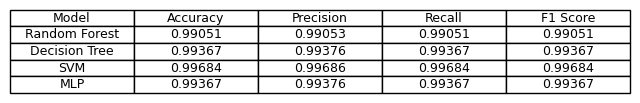

In [22]:
# Create a DataFrame for better formatting
df_table = pd.DataFrame(table_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Plot table and save as an image
fig, ax = plt.subplots(figsize=(8,1))
ax.axis('off')
ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc = 'center', loc='center')

plt.show()


<Figure size 640x480 with 0 Axes>